In [1]:
# imports
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (train_test_split, ShuffleSplit, 
                                     cross_val_score)

In [2]:
# import utils
from tp_arbres_source import (rand_bi_gauss, rand_checkers,
                              rand_tri_gauss, rand_clown, frontiere)

from tp_arbres_source import (plot_learning_curve, plot_depth_curve)

## Question 1

We suggest to measure the impurity of the resulting set, after spliting according to a variable and given a threshold,
by measuring the dispersion of the target values withing each resulting set.

Hence, the more the data points of a set have centered values (target values) the more this set would be pure.

Putting this reasoning into equation, we define the measure of impirity of a given set as the following:

$$ H(R) = \frac{1}{|R|} \sum_{y \in \{target \ value \ of \ x \in R \}} (y - \bar{y})^2 $$

## Question 2

In [3]:
# sample data
data = rand_checkers(n1=114, n2=114, n3=114, n4=114)

# plot
fig = go.Figure(data=[
    go.Scatter(
        x=data[:, 0],
        y=data[:, 1],
        marker_color=data[:, 2],
        mode="markers"
    )
])

fig.update_layout(
    title="Data sampled from rand_checkers",
    xaxis_title="x",
    yaxis_title="y"
)

fig.show()

In [4]:
# plot of proportions of mistakes

# params
range_depth = np.arange(1, 25)
X, y = data[:, :2], data[:, -1]

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.2,
    random_state=12365478
)

dict_error = {
    "gini": {"train": [], "test": [], "color": "#636EFA"},
    "entropy": {"train": [], "test": [], "color": "#EF553B"},
}

dict_data = {
    "train": {"X": X_train, "y": y_train},
    "test": {"X": X_test, "y": y_test}
}

for depth in range_depth:
    for impurity_measure in dict_error:
        # init / fit model
        classifier = DecisionTreeClassifier(
            criterion=impurity_measure,
            max_depth=depth,
            random_state=0
        )
        classifier.fit(X_train, y_train)

        for error_type, Xy in dict_data.items():
            y_true = Xy["y"]
            y_predicted = classifier.predict(Xy["X"])

            # compute / store error
            error = 1 - accuracy_score(y_true, y_predicted)
            dict_error[impurity_measure][error_type].append(error)

# plot
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Train", "Test"]
)

for i, error_type in enumerate(["train", "test"]):
    for impurity_measure in ["gini", "entropy"]:
        fig.add_trace(
            go.Scatter(
                x=range_depth,
                y=dict_error[impurity_measure][error_type],
                marker_color=dict_error[impurity_measure]["color"],
                name=impurity_measure,
                mode="lines+markers",
                showlegend=True if i == 0 else False
            ),
            row=1, col=i+1
        )

        fig.update_xaxes(
            title="max depth", 
            row=1, col=i+1
        )

        fig.update_yaxes(
            title="proportion of mistakes", 
            row=1, col=i+1
        )

fig.show()

- For training :
    - We observe that both **entropy** and **gini** impurity measures have similar evolution shape
    - They both decrease toward $0$ when ``max_depth`` increases
- For test:
    - They both have a minima which is reached at $7$ for gini and $10$ entropy 
    - they both attain a horizontal asymptot for a big ``max_depth`` which indicates an overfitting since the train error is still decrease in this region

## Question 3

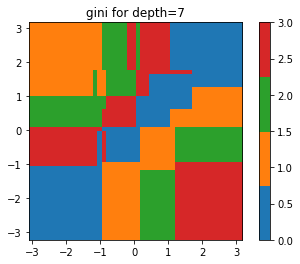

In [5]:
# plot of frontiere

# params
impurity_measure = "gini"
depth = 7

classifier = DecisionTreeClassifier(
    criterion=impurity_measure,
    max_depth=depth,
    random_state=0
)

classifier.fit(dict_data["train"]["X"], dict_data["train"]["y"])

plt.title(f"{impurity_measure} for depth={depth}")
frontiere(lambda x: classifier.predict(x), X)

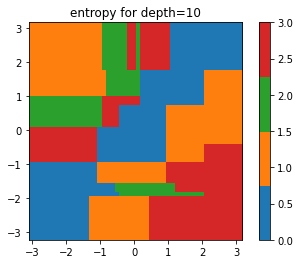

In [6]:
# params
impurity_measure = "entropy"
depth = 10

classifier = DecisionTreeClassifier(
    criterion=impurity_measure,
    max_depth=depth,
    random_state=0
)

classifier.fit(dict_data["train"]["X"], dict_data["train"]["y"])

plt.title(f"{impurity_measure} for depth={depth}")
frontiere(lambda x: classifier.predict(x), X)

## Question 4

In [7]:
# sample new data
data = rand_checkers(n1=40, n2=40, n3=40, n4=40)

X, y = data[:, :2], data[:, -1]

In [8]:
# plot of proportions of mistakes

# params
range_depth = np.arange(1, 25)
X, y = data[:, :2], data[:, -1]

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.2,
    random_state=12365478
)

dict_error = {
    "gini": {"train": [], "test": [], "color": "#636EFA"},
    "entropy": {"train": [], "test": [], "color": "#EF553B"},
}

dict_data = {
    "train": {"X": X_train, "y": y_train},
    "test": {"X": X_test, "y": y_test}
}

for depth in range_depth:
    for impurity_measure in dict_error:
        # init / fit model
        classifier = DecisionTreeClassifier(
            criterion=impurity_measure,
            max_depth=depth,
            random_state=0
        )
        classifier.fit(X_train, y_train)

        for error_type, Xy in dict_data.items():
            y_true = Xy["y"]
            y_predicted = classifier.predict(Xy["X"])

            # compute / store error
            error = 1 - accuracy_score(y_true, y_predicted)
            dict_error[impurity_measure][error_type].append(error)

# plot
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Train", "Test"]
)

for i, error_type in enumerate(["train", "test"]):
    for impurity_measure in ["gini", "entropy"]:
        fig.add_trace(
            go.Scatter(
                x=range_depth,
                y=dict_error[impurity_measure][error_type],
                marker_color=dict_error[impurity_measure]["color"],
                name=impurity_measure,
                mode="lines+markers",
                showlegend=True if i == 0 else False
            ),
            row=1, col=i+1
        )

        fig.update_xaxes(
            title="max depth", 
            row=1, col=i+1
        )

        fig.update_yaxes(
            title="proportion of mistakes", 
            row=1, col=i+1
        )

fig.show()

- we derive same conclusion as the ones stated above in **question 2**

## Question 5

In [9]:
data = rand_checkers(n1=100, n2=100, n3=100, n4=100, sigma=0.1)
X,y = data[:, :-1], data[:, -1]

In [10]:
# train logistic regression classifier
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X, y)
# repoort error rate 
print('Error rate: %.2f' % (1 - log_reg.score(X, y)))


Error rate: 0.77


In [11]:
# compare with a decision tree classifier

tree_reg = DecisionTreeClassifier()
tree_reg.fit(X, y)
print('Error rate: %.2f' % (1 - tree_reg.score(X, y)))

Error rate: 0.00


In [12]:
# the tree have a 0 rate of error since it fit perfectly the data ,
#  we cant say that the tree is better than the logistic regression since it can be a overfitting problem . 
# or the fact that the tree is more felexible at fitting the data (and capturing splits that reduce variance in data )
# the logreg in the other hand is a linear model (more bias ) 
# lets check the error rate of  our models on  scenaro when we have unseen data . 

In [13]:
data = rand_checkers(n1=150, n2=150, n3=150, n4=150, sigma=0.1)
X,y = data[:, :-1], data[:, -1]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# train logistic regression classifier
log_reg = LogisticRegression(multi_class='ovr')
log_reg.fit(X_train, y_train)

# repoort error rate
print('Error rate: %.2f' % (1 - log_reg.score(X_test, y_test)))

# compare with a decision tree classifier
tree_reg = DecisionTreeClassifier()
tree_reg.fit(X_train, y_train)

print('Error rate: %.2f' % (1 - tree_reg.score(X_test, y_test)))

Error rate: 0.81
Error rate: 0.16


In [14]:
# we can see that the tree is still better than the logistic regression but with a n oberfittign on the data . 


In [15]:
model_coefs = dict(zip( log_reg.classes_ , list(log_reg.coef_) ))
model_coefs

{0.0: array([0.10307929, 0.04686395]),
 1.0: array([-0.02350631, -0.03010583]),
 2.0: array([-0.01052095,  0.02758361]),
 3.0: array([-0.07142207, -0.04854964])}

In [16]:
# since we re using oov strategy the model output 4 set of coefs (pair for each class ) 
# we have two coefs for two variables . 

In [17]:
# intercept 
model_coefs = dict(zip( log_reg.classes_ , list(log_reg.intercept_) ))
model_coefs

{0.0: -1.1089571588856857,
 1.0: -1.1498696493520546,
 2.0: -0.9685236465769278,
 3.0: -1.1811665603107075}

In [18]:
# log_reg.score is a function that returns the accuracy of the trained model (after fit method ) on a given set .  
print(log_reg.score)

<bound method ClassifierMixin.score of LogisticRegression(multi_class='ovr')>


In [19]:
# load zipcode data
from sklearn.datasets import load_digits

data = load_digits()
X,y = data.data, data.target

In [20]:

for depth_val in range(1,20):
    # init a tree classifier
    tree_reg = DecisionTreeClassifier(max_depth=depth_val)
    # Evaluate a score by cross-validation
    scores = cross_val_score(tree_reg, X, y, cv=5)
    print('depth: %d, score: %.2f (%.2f)' % (depth_val, scores.mean(), scores.std()))
    

depth: 1, score: 0.20 (0.00)
depth: 2, score: 0.31 (0.00)
depth: 3, score: 0.43 (0.04)
depth: 4, score: 0.55 (0.05)
depth: 5, score: 0.63 (0.08)
depth: 6, score: 0.72 (0.06)
depth: 7, score: 0.74 (0.04)
depth: 8, score: 0.78 (0.04)
depth: 9, score: 0.78 (0.05)
depth: 10, score: 0.78 (0.04)
depth: 11, score: 0.78 (0.04)
depth: 12, score: 0.78 (0.03)
depth: 13, score: 0.78 (0.05)
depth: 14, score: 0.79 (0.04)
depth: 15, score: 0.78 (0.04)
depth: 16, score: 0.79 (0.04)
depth: 17, score: 0.77 (0.04)
depth: 18, score: 0.78 (0.04)
depth: 19, score: 0.78 (0.04)


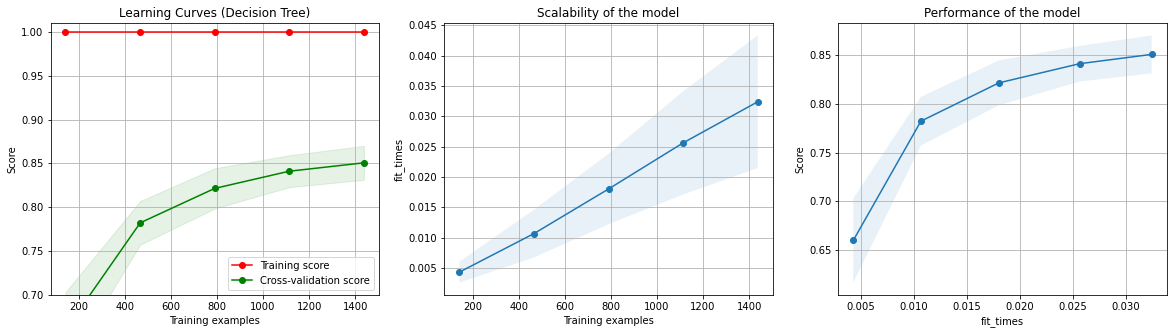

In [21]:

title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier()
plot_learning_curve(
    estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4
)


plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

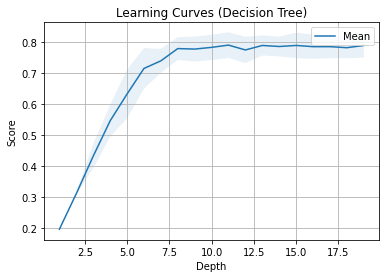

In [22]:
estimator = DecisionTreeClassifier
plot_depth_curve(estimator, title, X, y, depth_bounds=(1, 20))